In [1]:
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import os
import pickle
import pandas as pd
from sklearn.utils import resample
from Functions import *


pd.options.display.max_rows = 35 
pd.options.display.max_columns = None

In c:\users\heeeb\anaconda3\envs\codeacademy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\heeeb\anaconda3\envs\codeacademy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\heeeb\anaconda3\envs\codeacademy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In c:\users\heeeb\anaconda3\envs\codeacademy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\heeeb\anacon

In [2]:
df = pd.read_csv('data/TweetsOriginal.csv', encoding = 'ISO-8859-1')
x_train, x_test, y_train, y_test = clean_split(df)
print(x_train.shape, x_test.shape) 
print(y_train.shape, y_test.shape)

Original Value Counts
1.0    2978
0.0     570
Name: Emotion_New, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Final Resampled Value Counts
1.0    600
0.0    570
Name: Emotion_New, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(994, 652) (176, 652)
(994,) (176,)


### Test 1

In [3]:
models = {'Log': LogisticRegression(), 'Knn': KNeighborsClassifier(), 'DT': DecisionTreeClassifier(random_state = 10), 
          'Gaussian': GaussianNB(), 'Multinomail': MultinomialNB(), 'LDA': LinearDiscriminantAnalysis(),
          'LinearSVC': LinearSVC(max_iter = 1250, random_state = 10), 'SDGSVC': SGDClassifier(random_state = 10),  
          'ADA': AdaBoostClassifier(random_state = 10), 'Bagging': BaggingClassifier(random_state = 10), 
          'Ridge': RidgeClassifier(random_state = 10), 'RF': RandomForestClassifier(random_state = 10)}

#create stacked model
new_models = stacked_model(models)

# getting results and model
result_dict = test_models(x_train, y_train, new_models, n_jobs = 13)

save_cv_results(result_dict, 'models/VanillaResults1.p')

Evaluating STACKED: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 13/13 [02:32<00:00, 11.70s/it]


'Done'

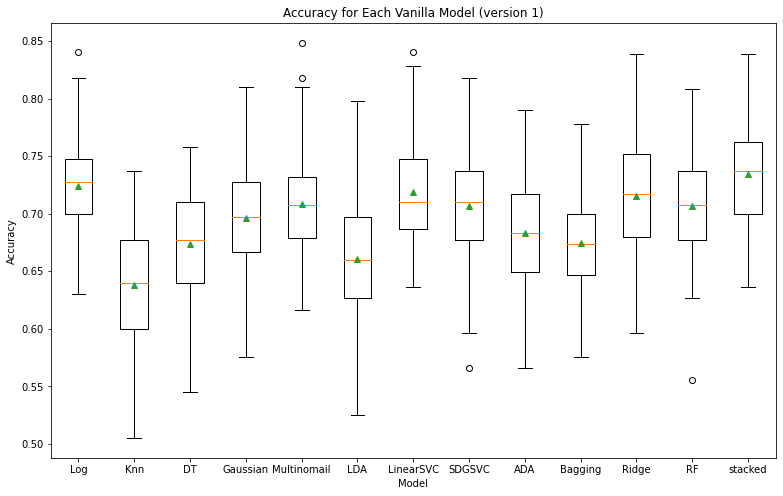

In [4]:
results = [i[1] for i in result_dict.items()]
model_names = [i for i in result_dict.keys()]
plot_model_results(results, model_names, 'figures/VanillaResults1', figure_title = 'Accuracy for Each Vanilla Model (version 1)', 
                   figsize = (13, 8))


### Test 2

In [10]:
models = {'Log': LogisticRegression(), 'Gaussian': GaussianNB(), 'Multinomail': MultinomialNB(), 
          'LinearSVC': LinearSVC(max_iter = 1250, random_state = 10), 'SDGSVC': SGDClassifier(random_state = 10),  
          'ADA': AdaBoostClassifier(random_state = 10), 'Bagging': BaggingClassifier(random_state = 10), 
          'Ridge': RidgeClassifier(random_state = 10), 'RF': RandomForestClassifier(random_state = 10)}

#create stacked model
new_models = stacked_model(models)

# getting results and model
result_dict = test_models(x_train, y_train, new_models, n_jobs = -1)

save_cv_results(result_dict, 'models/VanillaResults2.p')

Evaluating STACKED: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:43<00:00, 10.36s/it]


'Done'

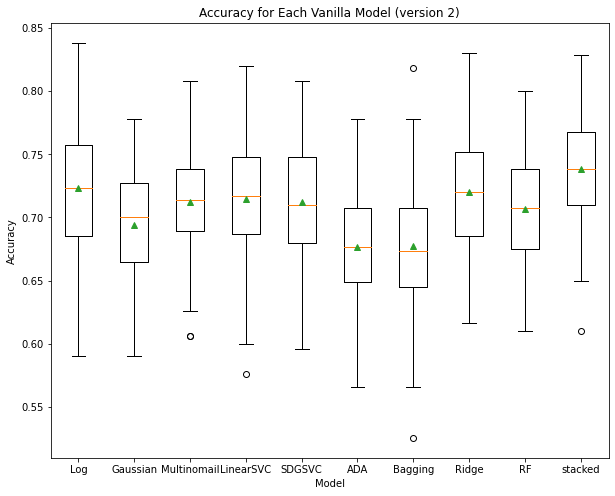

In [11]:
results = [i[1] for i in result_dict.items()]
model_names = [i for i in result_dict.keys()]
plot_model_results(results, model_names, 'figures/VanillaResults2', figure_title = 'Accuracy for Each Vanilla Model (version 2)', 
                   figsize = (10, 8))

### Test 3

In [12]:
models = {'Log': LogisticRegression(), 'Multinomail': MultinomialNB(), 
          'LinearSVC': LinearSVC(max_iter = 1250, random_state = 10), 'SDGSVC': SGDClassifier(random_state = 10),  
          'Bagging': BaggingClassifier(random_state = 10), 
          'Ridge': RidgeClassifier(random_state = 10), 'RF': RandomForestClassifier(random_state = 10)}

#create stacked model
new_models = stacked_model(models)

# getting results and model
result_dict = test_models(x_train, y_train, new_models, n_jobs = -1)

save_cv_results(result_dict, 'models/VanillaResults3.p')

Evaluating STACKED: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:58<00:00,  7.35s/it]


'Done'

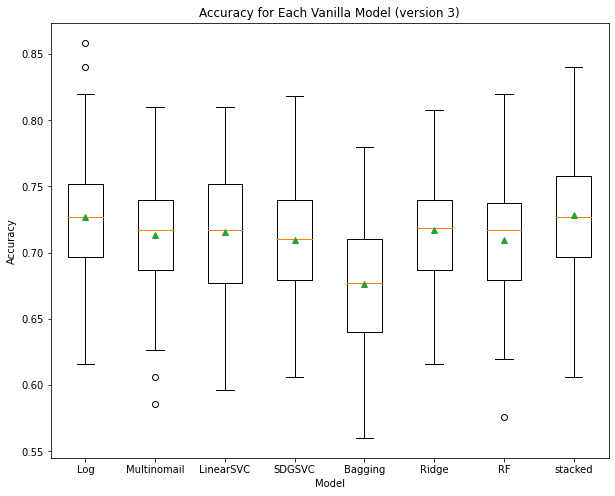

In [13]:
results = [i[1] for i in result_dict.items()]
model_names = [i for i in result_dict.keys()]
plot_model_results(results, model_names, 'figures/VanillaResults3', figure_title = 'Accuracy for Each Vanilla Model (version 3)', 
                   figsize = (10, 8))

In [ ]:
assert False

# Tuning Each Model Above

### Logistic Regression

In [14]:
vanilla_log = LogisticRegression()
vanilla_log.fit(x_train, y_train) 

print(f'Vanilla Train: {vanilla_log.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_log.score(x_test, y_test)}')

Vanilla Train: 0.9225352112676056
Vanilla Test: 0.7840909090909091


In [ ]:

param_grid = { 
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'dual': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'C': [.5, 1],
    'intercept_scaling': [.5, 1, 1.5],
    'class_weight': ['balanced', None],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000],
    'l1_ratio': [None, .5],
}

log_cv = run_gridsearch(LogisticRegression(), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1, verbose = 2)
pickle.dump(log_cv, open('../Pickles/Grid_Logistic.p', 'wb'))

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 3760 tasks      | elapsed:    4.8s


## MultinomialNB

In [ ]:
vanilla_multinb = MultinomialNB()
vanilla_multinb.fit(x_train, y_train) 

print(f'Vanilla Train: {vanilla_multinb.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_multinb.score(x_test, y_test)}')

In [ ]:
param_grid ={
    'alpha': [.1, .25, .5, 1, 1.5, 2], 
    'fit_prior': [True, False]
}
multinb_cv = run_gridsearch(MultinomialNB(), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1, verbose = 2)
pickle.dump(multinb_cv, open('../Pickles/Grid_MultiNB.p', 'wb'))

### SGDSVC

In [ ]:
vanilla_sgd = SGDClassifier(random_state = 10)
vanilla_sgd.fit(x_train, y_train)

print(f'Vanilla Train: {vanilla_sgd.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_sgd.score(x_test, y_test)}')

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'], 
    'loss': ['hinge', 'squared_hinge', 'log', 'modified_huber', 'perceptron'],
    'alpha': [.001, .0001, .00001],
    'l1_ratio': [.01, .15, .5], 
    'max_iter': [1000, 2000], 
    'tol': [1e-2, 1e-3, 1e-4],
    'shuffle': [True, False],
    'epsilon': [.05, .1, .5],
    'power_t': [.1, .5, 1], 
    'n_iter_no_change': [5,10],
    'average': [True, False]
    
}
sgd_cv = run_gridsearch(SGDClassifier(random_state = 10), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1,
                        verbose = 2)
pickle.dump(sgd_cv, open('../Pickles/Grid_SGD.p', 'wb'))

### LinearSVC

In [ ]:
vanilla_svc = LinearSVC(random_state = 10)
vanilla_svc.fit(x_train, y_train)

print(f'Vanilla Train: {vanilla_svc.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_svc.score(x_test, y_test)}')

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'], 
    'loss': ['hinge', 'squared_hinge'],
    'dual': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'C': [.5, 1.0, 1.5],
    'intercept_scaling': [.5, 1, 1.5],
    'max_iter': [1000, 2000]
}

svc_cv = run_gridsearch(LinearSVC(random_state = 10), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1,
                        verbose = 2)
pickle.dump(svc_cv, open('../Pickles/Grid_SVC.p', 'wb'))

### Ridge Classifier

In [ ]:
vanilla_ridge = RidgeClassifier(random_state = 10)
vanilla_ridge.fit(x_train, y_train)

print(f'Vanilla Train: {vanilla_ridge.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_ridge.score(x_test, y_test)}')

In [ ]:
param_grid = {
    'alpha': [.5, 1.0, 1.5], 
    'normalize': [True, False], 
    'tol': [1e-2, 1e-3, 1e-4], 
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 
    
}
ridge_cv = run_gridsearch(RidgeClassifier(random_state = 10), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1,
                        verbose = 2)
pickle.dump(ridge_cv, open('../Pickles/Grid_Ridge.p', 'wb'))

### Random Forest

In [ ]:
vanilla_rf = RandomForestClassifier(random_state = 10)
vanilla_rf.fit(x_train, y_train)

print(f'Vanilla Train: {vanilla_rf.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_rf.score(x_test, y_test)}')

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150], 
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 100, 200, 500],
    'min_samples_split': [2, 3, 5], 
    'min_samples_leaf': [1,2,5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 100, 200],
    'bootstrap': [True, False], 
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'ccp_alpha': [0.0, .5, 1.0]

    
    
}
rf_cv = run_gridsearch(RandomForestClassifier(random_state = 10), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1,
                        verbose = 2)
pickle.dump(rf_cv, open('../Pickles/Grid_RF.p', 'wb'))

In [ ]:
cv_dict = {'log': log_cv, 'multi': multnb_cv, 'sgd': sgd_cv, 'svc': svc_cv, 'ridge': ridge_cv}
pickle.dump(cv_dict, open('../Pickles/CombinedCV.p', 'wb'))

In [ ]:
assert False

### Bagging

In [ ]:
vanilla_ada = BaggingClassifier(random_state = 10)
vanilla_ada.fit(x_train, y_train)

print(f'Vanilla Train: {vanilla_ada.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_ada.score(x_test, y_test)}')

### ADA 

In [ ]:
vanilla_ada = AdaBoostClassifier(random_state = 10)
vanilla_ada.fit(x_train, y_train)

print(f'Vanilla Train: {vanilla_ada.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_ada.score(x_test, y_test)}')

In [ ]:
param_grid = {
    'base_estimator': [LogisticRegression(),  None, RandomForestClassifier(random_state = 10), 
                       DecisionTreeClassifier(random_state = 10)], 
    'n_estimators': [25, 50, 100], 
    'learning_rate': [.5, 1, 1.5], 
    'algorithm': ['SAMME', 'SAMME.R'], 
     
}
ada_cv = run_gridsearch(AdaBoostClassifier(random_state = 10), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1,
                        verbose = 2)
pickle.dump(ada_cv, open('../Pickles/Grid_ADA.p', 'wb'))

In [ ]:
assert False

In [ ]:
models = {'Log': LogisticRegression(C= 0.5, class_weight= None, 
                                    dual= False, intercept_scaling= 1, max_iter= 1000, 
                                    penalty= 'l2', solver= 'sag', tol= 0.0001), 
          'Multinomail': MultinomialNB(alpha = .5),
          'LinearSVC': LinearSVC(C = .5, intercept_scaling = .5, tol = .5, random_state = 10), 
          'SDGSVC': SGDClassifier(random_state = 10, alpha= 0.0001, average= True, 
                                  epsilon= 0.01, l1_ratio= 0.001, loss= 'log', 
                                  max_iter= 1000, n_iter_no_change= 5, 
                                  penalty= 'l1', power_t= 0.01, shuffle= False, tol= 0.1),  
          'Ridge': RidgeClassifier(random_state = 10, alpha= 1.5, normalize= True, solver= 'lsqr', tol= 0.01), 
          'RF': RandomForestClassifier(random_state = 10, bootstrap= True, ccp_alpha= 0.0, 
                                       class_weight= 'balanced_subsample', criterion= 'gini', 
                                       max_depth= 50, max_features= 'log2', max_leaf_nodes= None, 
                                       min_samples_leaf= 1, min_samples_split= 5, n_estimators= 150)}

#create stacked model
new_models = stacked_model(models)

# getting results and model
result_dict = test_models(x_train, y_train, new_models, n_jobs = -1)

save_cv_results(result_dict, 'models/FinalTunedResults.p')

In [ ]:
results = [i[1] for i in result_dict.items()]
model_names = [i for i in result_dict.keys()]
plot_model_results(results, model_names, 'figures/VanillaResults3', figure_title = 'Accuracy for Tuned Models', 
                   figsize = (10, 8))

### Final Stacked Model

In [ ]:
# final_stacked = new_models['stacked']
final_stacked = pickle.load(open('../Pickles/TunedStackedModel.p', 'rb'))
final_stacked.fit(x_train, y_train)
print(f'Tuned Stacked Train: {final_stacked.score(x_train, y_train)}')
print(f'Tuned Stacked Test: {final_stacked.score(x_test, y_test)}')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

fig, ax = plt.subplots(1,2, figsize = (10,5))

cm_train = confusion_matrix(y_train, final_stacked.predict(x_train))
cm_test = confusion_matrix(y_test, final_stacked.predict(x_test))

sns.heatmap(cm_train, annot = True, ax = ax[0], xticklabels = ['Negative', 'Positive'], 
            yticklabels = ['Negative', 'Positive'], cmap = 'Blues', cbar = False, fmt = 'g')
sns.heatmap(cm_test, annot = True, ax = ax[1], xticklabels = ['Negative', 'Positive'], 
            yticklabels = ['Negative', 'Positive'], cmap = 'Blues', cbar = False, fmt = 'g')


ax[0].set_title('Train')
ax[1].set_title('Test')

plt.savefig('figures/StackedTunedCM.png')
plt.show()

pickle.dump(final_stacked, open('../Pickles/TunedStackedModel.p', 'wb'))

In [ ]:
from sklearn.metrics import classification_report

cr_dict = {'train': classification_report(y_train, final_stacked.predict(x_train), target_names = ['Negative', 'Positive']), 
          'test': classification_report(y_test, final_stacked.predict(x_test), target_names = ['Negative', 'Positive'])}


pickle.dump(cr_dict, open('../Pickles/ClassificationReport.p', 'wb'))

In [ ]:
from sklearn.feature_selection import SelectFromModel
columns = pd.read_csv('data/TrainDF.csv').columns.tolist()
est_dict = final_stacked.named_estimators
word_import = {}
for i in final_stacked.named_estimators_: 
    mod = est_dict[i]
    smf = SelectFromModel(mod, threshold = - np.inf, max_features = 10)
    smf.fit(x_train, y_train)
    feature_idx = smf.get_support()
    feature_names = [columns[idx] for (idx, i) in enumerate(feature_idx) if i == True]
    word_import[i] = feature_names

print(word_import)

In [ ]:
from lime import lime_text
import lime.lime_tabular
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline
%matplotlib inline



df =pd.read_csv('data/TestDF.csv')
columns = df.columns.tolist()
feat = [i for i in columns if i not in ['target', 'Item']]


explainer = lime.lime_tabular.LimeTabularExplainer(df[[i for i in columns if i not in ['target', 'Item']]].values,
                                                   mode = 'classification', 
                                                  training_labels = df.target.values, 
                                                   feature_names = feat, random_state = 10, 
                                              )

i = 10
labels = ['Negative', 'Positive']
row = df.loc[i, feat].values
exp = explainer.explain_instance(row, final_stacked.predict_proba, num_features = 15) 
sent = ' '.join([feat[idx] for (idx, i) in enumerate(row) if i ==1])
pred = final_stacked.predict(row.reshape(1,-1))[0]
# print(f'Original Tokenized/Stemmed Tweet:\n\t\t"{sent}"')
# print(f'Actual Label:\n\t\t{labels[int(pred)]}')
exp.show_in_notebook(show_table = False)
plt.show()

In [ ]:
fig = exp.as_pyplot_figure()

In [ ]:
from lime import submodular_pick

sp_obj = submodular_pick.SubmodularPick(explainer, df[[i for i in columns if i not in ['target', 'Item']]].values, 
                                       final_stacked.predict_proba, num_features = 10, 
                                       num_exps_desired = 10)
[exp.as_pyplot_figure(label = 1) for exp in sp_obj.sp_explanations]